In [1]:
# Veri işlemi ve analiz için
import pandas as pd
import numpy as np

# Veri görselleştirme için
import matplotlib.pyplot as plt
import seaborn as sns


# Makine öğrenimi modelleri ve ön işleme için
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Uyarıları gizlemek için (isteğe bağlı)
import warnings
warnings.filterwarnings("ignore")

# Grafiklerin Jupyter içinde gösterilmesi için
%matplotlib inline

DEĞİŞKENLER VE TÜRKÇE KARŞILIKLARI :

DateAware - Fark Edilme Tarihi
DateSubmitted - Bildirim Tarihi
DataBreachCause - Veri İhlali Nedeni
DateStart - Başlangıç Tarihi
DateEnd - Bitiş Tarihi
Name - İsim
Id - Kimlik
CyberattackType - Siber Saldırı Türü
WashingtoniansAffected - Etkilenen Kişi Sayısı
IndustryType - Sektör Türü
WashingtoniansAffectedRange - Etkilenen Kişi Aralığı
BreachLifecycleRange - İhlal Yaşam Döngüsü Aralığı
DaysToContainBreach - İhlali Kontrol Altına Alma Süresi (Gün)
DaysToIdentifyBreach - İhlali Belirleme Süresi (Gün)
DiscoveredInProgress - Devam Ederken Keşfedildi
DaysOfExposure - Maruz Kalma Süresi (Gün)
EndedOnDayDiscovered - Keşfedildiği Gün Sona Erdi
DaysElapsedBeforeNotification - Bildirimden Önce Geçen Süre (Gün)
DaysOfExposureRange - Maruz Kalma Süresi Aralığı

In [3]:
# Veri setini yükleyin
df = pd.read_csv('WashıngtondaGerçekleşenVeriİhlalleri.csv')
# ilk 5 satır
df.head()

,DateAware,DateSubmitted,DataBreachCause,DateStart,DateEnd,Name,Id,CyberattackType,WashingtoniansAffected,IndustryType,WashingtoniansAffectedRange,BreachLifecycleRange,DaysToContainBreach,DaysToIdentifyBreach,DiscoveredInProgress,DaysOfExposure,EndedOnDayDiscovered,DaysElapsedBeforeNotification,DaysOfExposureRange
0,02/04/2021 12:00:00 AM,03/17/2021 12:00:00 AM,Cyberattack,02/04/2021 12:00:00 AM,02/08/2021 12:00:00 AM,Automatic Funds Transfer Services Inc.,10427,Ransomware,695.0,Finance,500-999,1-99,4.0,0.0,True,4.0,False,41.0,1-99
1,12/20/2019 12:00:00 AM,03/17/2021 12:00:00 AM,Cyberattack,NaN,NaN,PCS Revenue Control Systems,10428,Phishing,11807.0,Business,"10,000-49,999",Unknown,NaN,NaN,False,NaN,False,453.0,Unknown
2,02/22/2021 12:00:00 AM,03/17/2021 12:00:00 AM,Cyberattack,12/24/2020 12:00:00 AM,12/29/2020 12:00:00 AM,Western Union Retail Money Transfer Partner,10429,Malware,1555.0,Finance,"1,000-9,999",1-99,0.0,60.0,False,5.0,False,23.0,1-99
3,05/24/2020 12:00:00 AM,03/18/2021 12:00:00 AM,Cyberattack,05/24/2020 12:00:00 AM,NaN,Manson Counstruction Co.,10430,Unclear/unknown,1049.0,Business,"1,000-9,999",Unknown,NaN,0.0,False,NaN,False,298.0,Unknown
4,01/18/2021 12:00:00 AM,03/19/2021 12:00:00 AM,Cyberattack,01/12/2021 12:00:00 AM,01/18/2021 12:00:00 AM,Cancer Treatment Centers of America,10431,Phishing,579.0,Health,500-999,1-99,0.0,6.0,True,6.0,True,60.0,1-99


In [4]:
#son 5 satır 
df.tail()

,DateAware,DateSubmitted,DataBreachCause,DateStart,DateEnd,Name,Id,CyberattackType,WashingtoniansAffected,IndustryType,WashingtoniansAffectedRange,BreachLifecycleRange,DaysToContainBreach,DaysToIdentifyBreach,DiscoveredInProgress,DaysOfExposure,EndedOnDayDiscovered,DaysElapsedBeforeNotification,DaysOfExposureRange
1208,04/10/2024 12:00:00 AM,05/30/2024 12:00:00 AM,Cyberattack,02/21/2024 12:00:00 AM,02/21/2024 12:00:00 AM,"Amgen, Inc. (The Lash Group, LLC)",17167,Malware,14081.0,Health,"10,000-49,999",1-99,0.0,49.0,False,0.0,False,50.0,0
1209,04/10/2024 12:00:00 AM,05/23/2024 12:00:00 AM,Cyberattack,02/21/2024 12:00:00 AM,02/21/2024 12:00:00 AM,"Dendreon Pharmaceuticals (The Lash Group, LLC)",17168,Malware,920.0,Health,500-999,1-99,0.0,49.0,False,0.0,False,43.0,0
1210,04/10/2024 12:00:00 AM,05/24/2024 12:00:00 AM,Cyberattack,02/21/2024 12:00:00 AM,02/21/2024 12:00:00 AM,GlaxoSmithKline Group of Companies/GSK Patient...,17169,Malware,6617.0,Health,"1,000-9,999",1-99,0.0,49.0,False,0.0,False,44.0,0
1211,04/10/2024 12:00:00 AM,05/22/2024 12:00:00 AM,Cyberattack,02/21/2024 12:00:00 AM,02/21/2024 12:00:00 AM,Novartis Pharmaceuticals Corporation (The Lash...,17170,Malware,2520.0,Health,"1,000-9,999",1-99,0.0,49.0,False,0.0,False,42.0,0
1212,12/06/2021 12:00:00 AM,08/19/2022 12:00:00 AM,Unauthorized Access,10/27/2021 12:00:00 AM,12/07/2021 12:00:00 AM,Community Loan Servicing LLC,13691,NaN,7518.0,Finance,"1,000-9,999",1-99,1.0,40.0,True,41.0,False,256.0,1-99


In [5]:
#  Veri seti hakkında temel bilgi
print("Veri Seti Hakkında Temel Bilgi:")
print(df.info())
print("\n" + "="*50)

Veri Seti Hakkında Temel Bilgi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DateAware                      1190 non-null   object 
 1   DateSubmitted                  1213 non-null   object 
 2   DataBreachCause                1213 non-null   object 
 3   DateStart                      1073 non-null   object 
 4   DateEnd                        998 non-null    object 
 5   Name                           1213 non-null   object 
 6   Id                             1213 non-null   int64  
 7   CyberattackType                887 non-null    object 
 8   WashingtoniansAffected         1181 non-null   float64
 9   IndustryType                   1213 non-null   object 
 10  WashingtoniansAffectedRange    1213 non-null   object 
 11  BreachLifecycleRange           1213 non-null   object 
 12  DaysToContainBre

In [7]:
# Veri setinin temel istatistiksel özet bilgisi
print("Veri Setinin Temel İstatistiksel Özeti:")
print(df.describe())
print("\n" + "="*50)

Veri Setinin Temel İstatistiksel Özeti:
                 Id  WashingtoniansAffected  DaysToContainBreach  \
count   1213.000000            1.181000e+03           982.000000   
mean   12542.934872            3.117419e+04             5.719959   
std     2645.735843            1.807201e+05            29.017868   
min     9561.000000            1.500000e+01             0.000000   
25%    10332.000000            8.570000e+02             0.000000   
50%    11040.000000            1.819000e+03             0.000000   
75%    15351.000000            6.889000e+03             0.000000   
max    17529.000000            3.243664e+06           366.000000   

       DaysToIdentifyBreach  DaysOfExposure  DaysElapsedBeforeNotification  
count           1054.000000      980.000000                    1190.000000  
mean             118.834915       93.488776                      95.315966  
std              269.602809      206.866754                      99.239604  
min             -503.000000     -503.00

In [8]:
# Boş değer kontrolü (sütun bazında sayısı ve yüzdesi)
print("Boş Değer Kontrolü:")
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100
null_df = pd.DataFrame({
    'Eksik Değer Sayısı': null_counts,
    'Eksik Değer Yüzdesi (%)': null_percentages
})
print(null_df[null_df['Eksik Değer Sayısı'] > 0])
print("\n" + "="*50)

Boş Değer Kontrolü:
                               Eksik Değer Sayısı  Eksik Değer Yüzdesi (%)
DateAware                                      23                 1.896125
DateStart                                     140                11.541632
DateEnd                                       215                17.724650
CyberattackType                               326                26.875515
WashingtoniansAffected                         32                 2.638087
DaysToContainBreach                           231                19.043693
DaysToIdentifyBreach                          159                13.107997
DaysOfExposure                                233                19.208574
DaysElapsedBeforeNotification                  23                 1.896125



In [9]:
#  Veri setinin boyutu
print("Veri Setinin Boyutu (Satır, Sütun):")
print(df.shape)
print("\n" + "="*50)

#  Toplam veri sayısı
print("Toplam Veri Sayısı:")
print(df.size)
print("\n" + "="*50)

Veri Setinin Boyutu (Satır, Sütun):
(1213, 19)

Toplam Veri Sayısı:
23047



In [10]:
# Benzersiz değerlerin sayısını hesaplayın
unique_counts = df.nunique().reset_index()
unique_counts.columns = ["Sütun Adı", "Benzersiz Değer Sayısı"]
unique_counts

,Sütun Adı,Benzersiz Değer Sayısı
0,DateAware,815
1,DateSubmitted,811
2,DataBreachCause,3
3,DateStart,694
4,DateEnd,639
5,Name,1173
6,Id,1213
7,CyberattackType,6
8,WashingtoniansAffected,1026
9,IndustryType,6


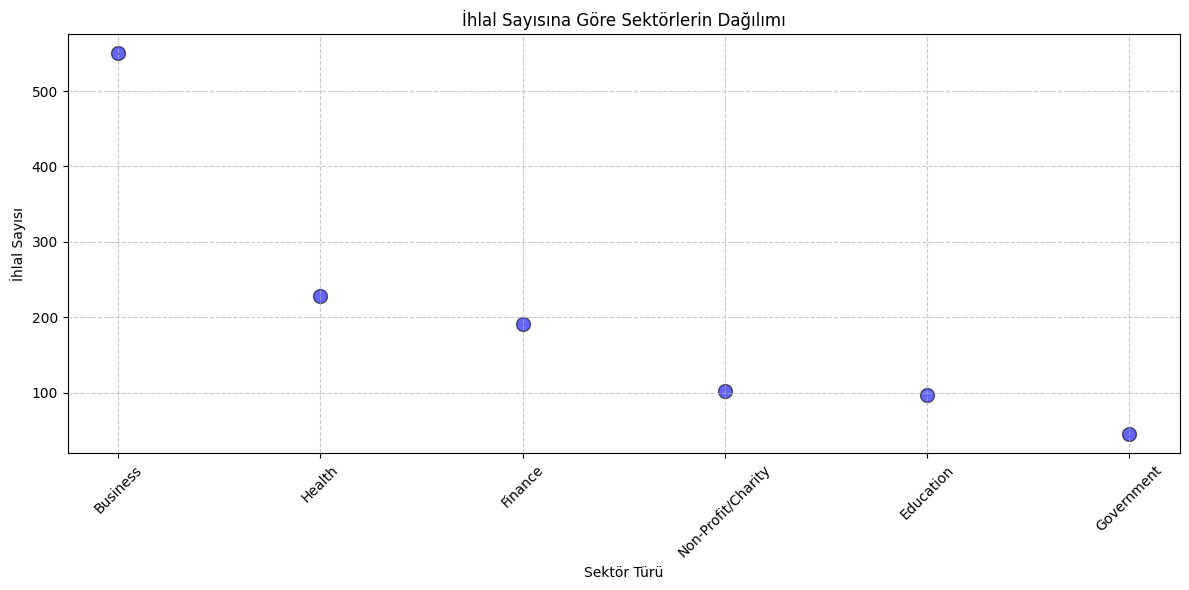

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Veri yükleme (dosya yolunu güncelleyin)
df = pd.read_csv('WashıngtondaGerçekleşenVeriİhlalleri.csv')

# Sektörlere göre ihlal sayısını hesaplama
sector_breach_counts = df['IndustryType'].value_counts().reset_index()
sector_breach_counts.columns = ['IndustryType', 'BreachCount']

# Dağılım grafiği oluşturma
plt.figure(figsize=(12, 6))
plt.scatter(sector_breach_counts['IndustryType'], sector_breach_counts['BreachCount'], color='b', alpha=0.6, edgecolor='k', s=100)

# Grafik ayarları
plt.xlabel("Sektör Türü")
plt.ylabel("İhlal Sayısı")
plt.title("İhlal Sayısına Göre Sektörlerin Dağılımı")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

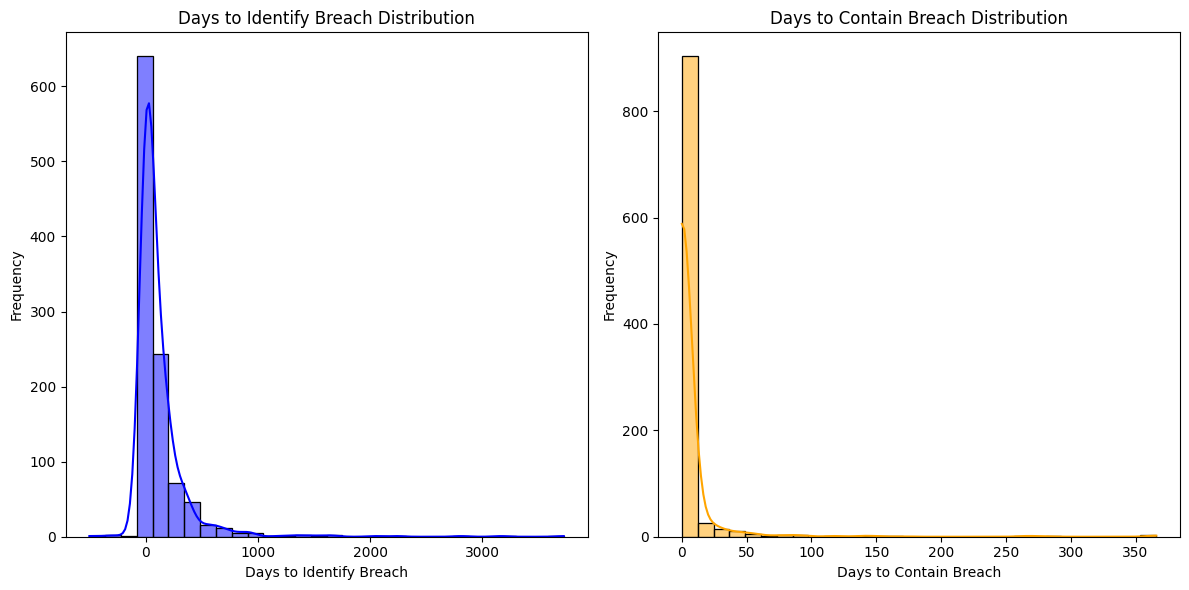

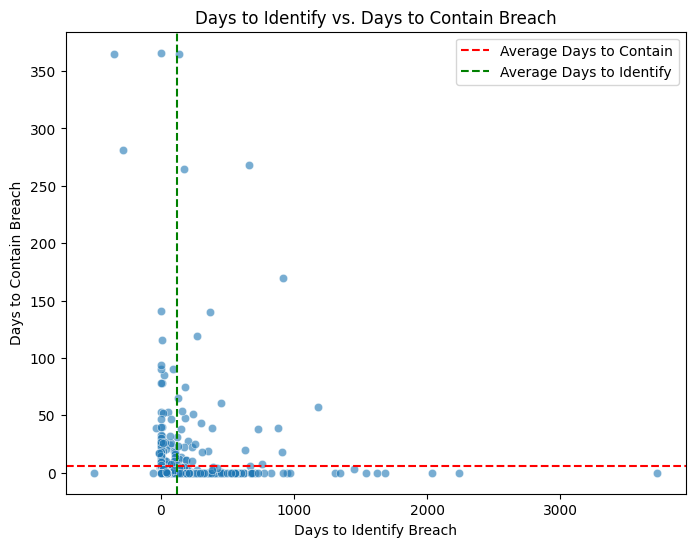

In [13]:
# Histogram ile tanımlama ve kontrol sürelerini görselleştir
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['DaysToIdentifyBreach'], bins=30, color='blue', kde=True)
plt.title('Days to Identify Breach Distribution')
plt.xlabel('Days to Identify Breach')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['DaysToContainBreach'], bins=30, color='orange', kde=True)
plt.title('Days to Contain Breach Distribution')
plt.xlabel('Days to Contain Breach')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Ortalama süreleri hesapla
avg_days = {
    'Average Days to Identify Breach': df['DaysToIdentifyBreach'].mean(),
    'Average Days to Contain Breach': df['DaysToContainBreach'].mean()
}


# Tanımlama ve kontrol süreleri arasındaki ilişkiyi görselleştir
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='DaysToIdentifyBreach', y='DaysToContainBreach', alpha=0.6)
plt.title('Days to Identify vs. Days to Contain Breach')
plt.xlabel('Days to Identify Breach')
plt.ylabel('Days to Contain Breach')
plt.axhline(y=df['DaysToContainBreach'].mean(), color='r', linestyle='--', label='Average Days to Contain')
plt.axvline(x=df['DaysToIdentifyBreach'].mean(), color='g', linestyle='--', label='Average Days to Identify')
plt.legend()
plt.show()

# Ortalama süreleri hesapla
avg_days = {
    'Average Days to Identify Breach': df['DaysToIdentifyBreach'].mean(),
    'Average Days to Contain Breach': df['DaysToContainBreach'].mean()
}






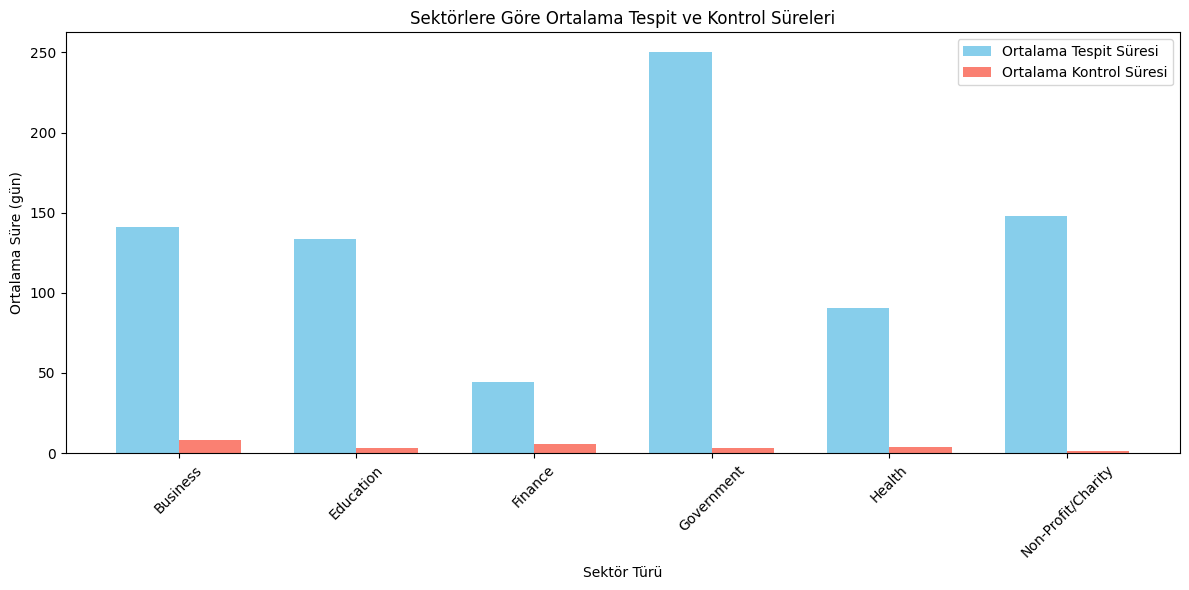

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Veri yükleme (dosya yolunu güncelleyin)
df = pd.read_csv('WashıngtondaGerçekleşenVeriİhlalleri.csv')

# Sektörlere göre gruplandırarak ortalama tespit ve kontrol sürelerini hesaplama
sector_avg_times = df.groupby('IndustryType').agg(
    AvgDaysToIdentify=('DaysToIdentifyBreach', 'mean'),
    AvgDaysToContain=('DaysToContainBreach', 'mean')
).reset_index()

# Grafik oluşturma
x = np.arange(len(sector_avg_times['IndustryType']))  # X ekseni için sektör türleri
width = 0.35  # Çubukların genişliği

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, sector_avg_times['AvgDaysToIdentify'], width, label='Ortalama Tespit Süresi', color='skyblue')
bars2 = ax.bar(x + width/2, sector_avg_times['AvgDaysToContain'], width, label='Ortalama Kontrol Süresi', color='salmon')

# Grafik ayarları
ax.set_xlabel("Sektör Türü")
ax.set_ylabel("Ortalama Süre (gün)")
ax.set_title("Sektörlere Göre Ortalama Tespit ve Kontrol Süreleri")
ax.set_xticks(x)
ax.set_xticklabels(sector_avg_times['IndustryType'], rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

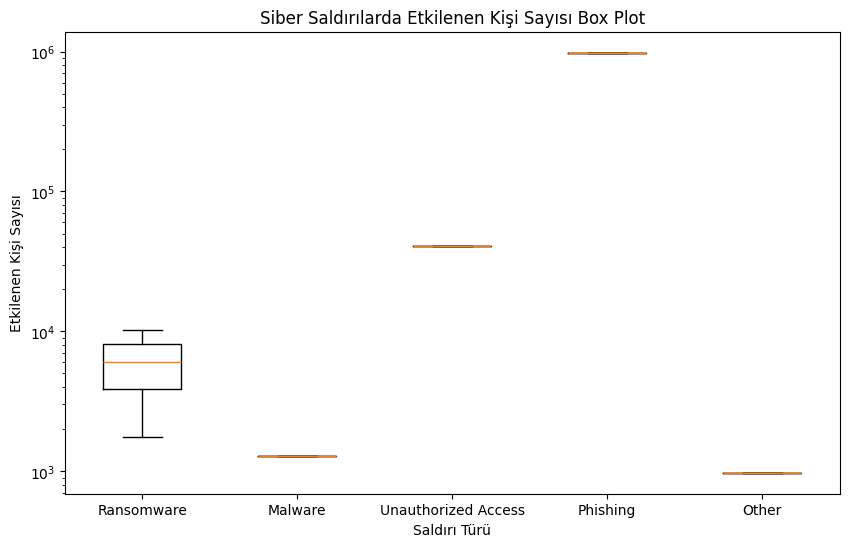

In [15]:
import matplotlib.pyplot as plt

# Veri Seti
saldiri_turleri = ['Ransomware', 'Ransomware', 'Malware', 'Unauthorized Access', 'Phishing', 'Other']
etkilenen_kisi_sayilari = [10267, 1753, 1284, 40998, 981068, 975]

# Saldırı türlerini gruplama
data = {
 'Ransomware': [10267, 1753],
 'Malware': [1284],
 'Unauthorized Access': [40998],
 'Phishing': [981068],
 'Other': [975]
}

# Box plot oluşturma
plt.figure(figsize=(10, 6))
plt.boxplot(data.values(), labels=data.keys())
plt.title('Siber Saldırılarda Etkilenen Kişi Sayısı Box Plot')
plt.xlabel('Saldırı Türü')
plt.ylabel('Etkilenen Kişi Sayısı')
plt.yscale('log') # Veriler çok büyükse log ölçeği kullanılabilir
plt.show()

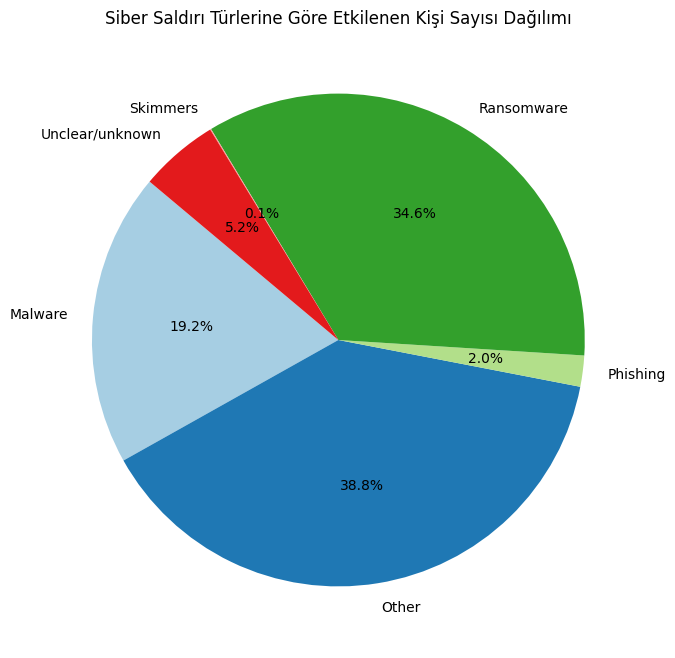

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Veri yükleme (dosya yolunu güncelleyin)
df = pd.read_csv('WashıngtondaGerçekleşenVeriİhlalleri.csv')

# Siber saldırı türüne göre etkilenen kişi sayısını toplama
cyberattack_impact = df.groupby('CyberattackType').agg(
    TotalAffected=('WashingtoniansAffected', 'sum')
).reset_index()

# Pasta grafik oluşturma
plt.figure(figsize=(8, 8))
plt.pie(cyberattack_impact['TotalAffected'], labels=cyberattack_impact['CyberattackType'], 
        autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Grafik ayarları
plt.title("Siber Saldırı Türlerine Göre Etkilenen Kişi Sayısı Dağılımı")
plt.show()


      Year        IndustryType  WashingtoniansAffected
0   2014.0            Business                  1355.0
1   2015.0            Business                373583.0
2   2015.0             Finance                  5270.0
3   2015.0          Government                 91187.0
4   2015.0              Health                  4324.0
5   2016.0            Business                112440.0
6   2016.0             Finance                  7846.0
7   2016.0          Government               1449645.0
8   2016.0              Health                381092.0
9   2017.0            Business                148044.0
10  2017.0           Education                773826.0
11  2017.0             Finance               3280841.0
12  2017.0          Government                  1500.0
13  2017.0              Health                  4333.0
14  2017.0  Non-Profit/Charity                  1463.0
15  2018.0            Business                243581.0
16  2018.0           Education                  9652.0
17  2018.0

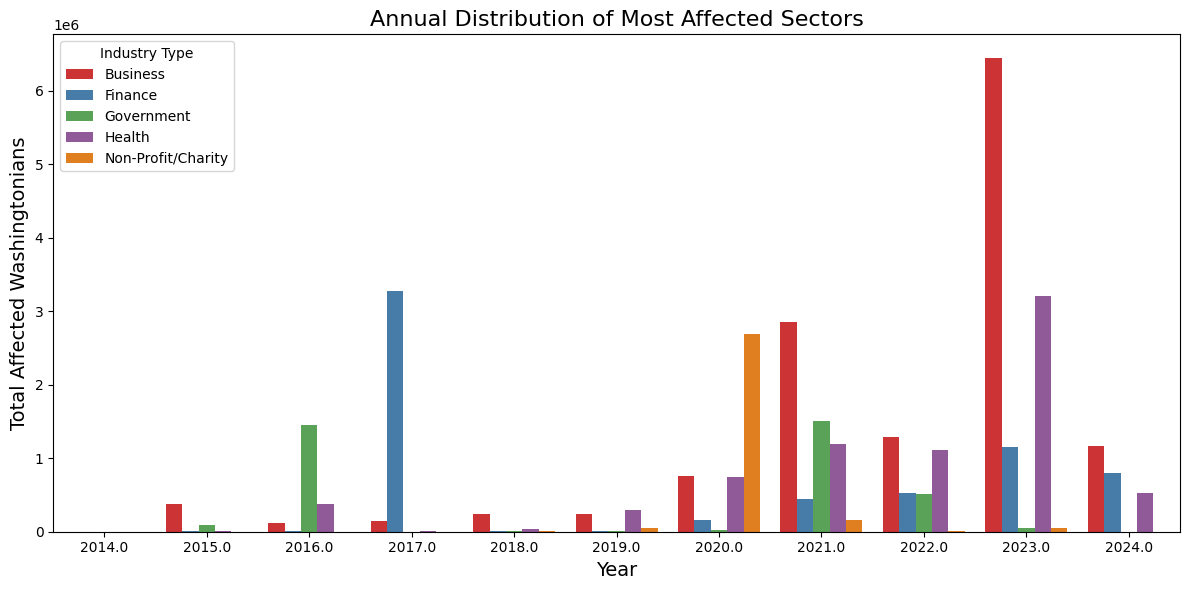

In [17]:
# DateAware sütununu tarih formatına çevir (eğer henüz çevrilmediyse)
df['DateAware'] = pd.to_datetime(df['DateAware'])

# Yılı çıkartmak için yeni bir sütun ekle
df['Year'] = df['DateAware'].dt.year

# Yıl ve sektör bazında toplam etkilenen kişi sayısını hesapla
annual_sector_affected = df.groupby(['Year', 'IndustryType'])['WashingtoniansAffected'].sum().reset_index()

# Sonuçları görüntüle
print(annual_sector_affected)

# Toplam etkilenen kişi sayısına göre sektörleri sıralama
top_sectors = df.groupby('IndustryType')['WashingtoniansAffected'].sum().nlargest(5).index.tolist()

# En çok etkilenen sektörlere göre yıllık etkilenen kişi sayısını filtreleme
top_annual_sector_affected = annual_sector_affected[annual_sector_affected['IndustryType'].isin(top_sectors)]

# Sonuçları görüntüle
print(top_annual_sector_affected)

# Çubuk grafik ile en çok etkilenen sektörlerin yıllık dağılımını görselleştir
plt.figure(figsize=(12, 6))
sns.barplot(data=top_annual_sector_affected, x='Year', y='WashingtoniansAffected', hue='IndustryType', palette='Set1')

# Grafik ayarları
plt.title('Annual Distribution of Most Affected Sectors', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Affected Washingtonians', fontsize=14)
plt.legend(title='Industry Type')
plt.tight_layout()

# Grafiği göster
plt.show()

      Year        IndustryType  DaysToIdentifyBreach  DaysToContainBreach  \
0   2014.0            Business                 127.0                  0.0   
1   2015.0            Business                2340.0                 14.0   
2   2015.0             Finance                   3.0                  0.0   
3   2015.0          Government                 761.0                  8.0   
4   2015.0              Health                 631.0                  0.0   
5   2016.0            Business                3343.0                102.0   
6   2016.0             Finance                  75.0                  0.0   
7   2016.0          Government                   0.0                  0.0   
8   2016.0              Health                 518.0                  0.0   
9   2017.0            Business               12392.0                234.0   
10  2017.0           Education                 262.0                 27.0   
11  2017.0             Finance                 892.0                 21.0   

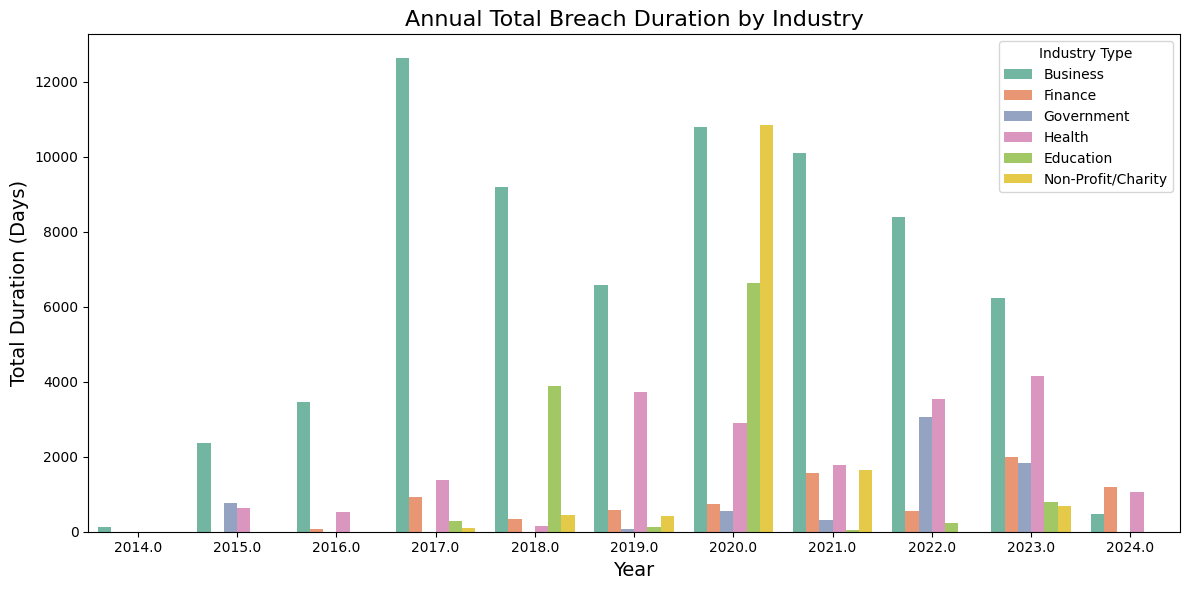

In [19]:
# DateAware sütununu tarih formatına çevir (eğer henüz çevrilmediyse)
df['DateAware'] = pd.to_datetime(df['DateAware'])

# Yılı çıkartmak için yeni bir sütun ekle
df['Year'] = df['DateAware'].dt.year

# Yıl ve sektör bazında toplam ihlal sürelerini hesapla
annual_sector_duration = df.groupby(['Year', 'IndustryType'])[['DaysToIdentifyBreach', 'DaysToContainBreach']].sum().reset_index()

# Toplam süreyi hesapla
annual_sector_duration['TotalDuration'] = annual_sector_duration['DaysToIdentifyBreach'] + annual_sector_duration['DaysToContainBreach']

# Sonuçları görüntüle
print(annual_sector_duration)

# Çubuk grafik ile yıllık toplam ihlal sürelerini görselleştir
plt.figure(figsize=(12, 6))
sns.barplot(data=annual_sector_duration, x='Year', y='TotalDuration', hue='IndustryType', palette='Set2')

# Grafik ayarları
plt.title('Annual Total Breach Duration by Industry', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Duration (Days)', fontsize=14)
plt.legend(title='Industry Type')
plt.tight_layout()

# Grafiği göster
plt.show()


In [2]:
# Veri setini yükleyin
df = pd.read_csv('WashıngtondaGerçekleşenVeriİhlalleri.csv')

# Tarih sütunlarını kaldırın (ya da sayısal olarak işleyebilirsiniz)
df = df.drop(columns=['DateAware', 'DateSubmitted', 'DateStart', 'DateEnd'])

# Kategorik değişkenleri sayısal hale getirin
label_encoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_encoder.fit_transform(df[col])

# Eksik değerleri doldurun (Örneğin, 0 ile doldurmak)
df.fillna(0, inplace=True)


# Özellikleri (X) ve hedef değişkeni (y) belirleyin
X = df.drop(columns=['DaysToContainBreach', 'WashingtoniansAffected'])
y_days_to_contain = df['DaysToContainBreach']

# Veriyi eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y_days_to_contain, test_size=0.2, random_state=42)

# Özellikleri ölçeklendirin
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeli tanımlayın (RandomForestRegressor kullanıyoruz)
model_days_to_contain = RandomForestRegressor(random_state=42)
model_days_to_contain.fit(X_train, y_train)

# Tahmin yapın ve model performansını değerlendirin
y_pred = model_days_to_contain.predict(X_test)
print("DaysToContainBreach için R2 Skoru:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))


DaysToContainBreach için R2 Skoru: 0.5198878329762691
Mean Absolute Error: 2.1734567901234567
Root Mean Squared Error: 7.359677624224466


Eksik veya aykırı değerleri daha dikkatli ele almak, modelin performansını iyileştirebilir.

In [21]:
# Özellikleri (X) ve hedef değişkeni (y) belirleyin
X = df.drop(columns=['DaysToContainBreach', 'WashingtoniansAffected'])
y_washingtonians_affected = df['WashingtoniansAffected']

# Veriyi eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y_washingtonians_affected, test_size=0.2, random_state=42)

# Özellikleri ölçeklendirin
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeli tanımlayın (RandomForestRegressor kullanıyoruz)
model_washingtonians_affected = RandomForestRegressor(random_state=42)
model_washingtonians_affected.fit(X_train, y_train)

# Tahmin yapın ve model performansını değerlendirin
y_pred = model_washingtonians_affected.predict(X_test)
print("WashingtoniansAffected için R2 Skoru:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

WashingtoniansAffected için R2 Skoru: 0.7305601818479346
Mean Absolute Error: 28803.028106995884
Root Mean Squared Error: 167099.842449968


Büyük varyanslı ya da uç değerler içeren gözlemleri belirlemek ve bunları daha iyi işlemek (örneğin, yeniden ölçeklendirmek veya aykırı değer azaltma yöntemleri uygulamak) modelin performansını artırabilir.

In [22]:
import pandas as pd

# Veri setini okuyun
df = pd.read_csv('WashıngtondaGerçekleşenVeriİhlalleri.csv')

# Saldırı türü ve sektör için örnek çarpanlar
# Bu çarpanlar, saldırı türüne ve sektöre göre düzenlenebilir
attack_type_multiplier = {
    'Malware': 3,
    'Phishing': 2,
    'Ransomware': 4,
    'Hacking': 5,
    'Other': 1  # diğer saldırı türleri düşük risk için
}

industry_multiplier = {
    'Healthcare': 5,
    'Finance': 4,
    'Retail': 3,
    'Education': 2,
    'Other': 1  # diğer sektörler düşük risk için
}

# Çarpanları veri setine ekleyelim
df['AttackTypeMultiplier'] = df['CyberattackType'].map(attack_type_multiplier).fillna(1)
df['IndustryMultiplier'] = df['IndustryType'].map(industry_multiplier).fillna(1)

# Risk Skoru hesaplama
df['RiskScore'] = df['WashingtoniansAffected'] * df['AttackTypeMultiplier'] * df['IndustryMultiplier']

# Geçici sütunları kaldırarak veriyi sadeleştirelim
df = df.drop(columns=['AttackTypeMultiplier', 'IndustryMultiplier'])

# İlk 5 satırı görüntüleyelim
print(df[['CyberattackType', 'IndustryType', 'WashingtoniansAffected', 'RiskScore']].head())


   CyberattackType IndustryType  WashingtoniansAffected  RiskScore
0       Ransomware      Finance                   695.0    11120.0
1         Phishing     Business                 11807.0    23614.0
2          Malware      Finance                  1555.0    18660.0
3  Unclear/unknown     Business                  1049.0     1049.0
4         Phishing       Health                   579.0     1158.0
